<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewer's comment v1</h1>

Hello Omri, my name is Dmitrii. Happy to review your project! 🙌

As usual you can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments
</div>

Please don't remove my comments :) If you have any questions don't hesitate to respond to my comments in a different section. 
<div class="alert alert-info"> <b>Student comments:</b> For example like this</div>    


<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v1</b>
    
<b>Overall Feedback</b> 
    
Overall well done! I can see that a lot of effort has been made! Your project already looks really good, and you accomplished impressive results.

However, there are some comments/areas left to fix that will help you to make your project even better:

- Update data merge type.
- Update data rounding for web-traffic. 
- Plot histograms and describe distributions. 
- Update hypotheses and interim conclusions. 
  
And of course, if you have any questions along the way, remember that you can always reach out to your tutor for any clarification.
</div>

<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v2:</b>
    
<b>Overall Feedback</b> 
    
Thank you for submitting your project with additional improvements! 

There is only one comment regarding hypotheses. I left an additional comment regarding that. Can you please check it?
    
And of course, if you have any questions along the way, remember that you can always reach out to your tutor for any clarification.
    

<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v3:</b>
    
<b>Overall Feedback</b> 
    
Thank you for submitting your project with additional improvements! 

There are no critical issues left, so your project has been accepted. Wish you cool projects in the next sprints 🍀

PS: As a last thing, I can recommend cool lectures on stat analysis here: https://www.youtube.com/playlist?list=PL2SOU6wwxB0uwwH80KTQ6ht66KWxbzTIo 🙌
</div>

# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain for yourself the purpose of the project and actions you plan to take.]

[Please bear in mind that studying, amending, and analyzing data is an iterative process. It is normal to return to previous steps and correct/expand them to allow for further steps.]

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
Great that you added additional information about the project goal and tasks.

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib as plt



## Load data

In [2]:
# Load the data files into different DataFrames
data_calls = pd.read_csv('/datasets/megaline_calls.csv')
data_internet = pd.read_csv('/datasets/megaline_internet.csv')
data_messages = pd.read_csv('/datasets/megaline_messages.csv')
data_plans = pd.read_csv('/datasets/megaline_plans.csv')
data_users = pd.read_csv('/datasets/megaline_users.csv')


## Prepare the data

[The data for this project is split into several tables. Explore each one to get an initial understanding of the data. Do necessary corrections to each table if necessary.]

## Plans

In [3]:
# Print the general/summary information about the plans' DataFrame
data_plans.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Print a sample of data for plans
data_plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
 We will want to rename some of the columns for better clarity, and change the values from megabytes to gigabytes.

## Fix data

[Fix obvious issues with the data given the initial observations.]

In [5]:
column_plans_dict = {'messages_included' : 'messages',
                     'mb_per_month_included' : 'gb_per_month',
                     'minutes_included' : 'minutes',
                    'usd_monthly_pay' : 'monthly_cost',
                    'usd_per_gb' : 'extra_per_gb',
                    'usd_per_message' : 'extra_per_message',
                    'usd_per_minute' : 'extra_per_minute'}
data_plans = data_plans.rename(columns=column_plans_dict)

In [6]:
data_plans = data_plans.replace(15360, 15).replace(30720, 30)
data_plans

,messages,gb_per_month,minutes,monthly_cost,extra_per_gb,extra_per_message,extra_per_minute,plan_name
0,50,15,500,20,10,0.03,0.03,surf
1,1000,30,3000,70,7,0.01,0.01,ultimate


## Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [7]:
data_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   messages           2 non-null      int64  
 1   gb_per_month       2 non-null      int64  
 2   minutes            2 non-null      int64  
 3   monthly_cost       2 non-null      int64  
 4   extra_per_gb       2 non-null      int64  
 5   extra_per_message  2 non-null      float64
 6   extra_per_minute   2 non-null      float64
 7   plan_name          2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


## Users

In [8]:
# Print the general/summary information about the users' DataFrame
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [9]:
# Print a sample of data for users
data_users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    We see that our columns with dates are of the object type. We will change them to datetime objects.

### Fix Data

[Fix obvious issues with the data given the initial observations.]

In [10]:
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y-%m-%d')
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'], format='%Y-%m-%d')
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Enrich Data

[Add additional factors to the data if you believe they might be useful.]

In [11]:
data_users['churn_date'].value_counts().sum()

34

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    We see that we have a total of 34 entries with a datetime value in the churn_date column. This means that all NaN values in this column are contracts that are still active. Therefore, we will not try and fill these missing values.

## Calls

In [12]:
# Print the general/summary information about the calls' DataFrame
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [13]:
# Print a sample of data for calls
data_calls.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix data

[Fix obvious issues with the data given the initial observations.]

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    As was detailed in the project description, each individual call is rounded up. Therefore, we will round up all the values in the duration column, and change the type of the column from float64 to int64.

In [14]:
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')
replace_calls = {'id' : 'call_id'}
data_calls = data_calls.rename(columns=replace_calls)
data_calls['duration'] = data_calls['duration'].apply(np.ceil)
data_calls['duration'] = data_calls['duration'].astype('int')
data_calls['month'] = data_calls['call_date'].dt.month
data_calls.info()
print(data_calls)
#data_plans

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   call_id    137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int64         
 4   month      137735 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 5.3+ MB
         call_id  user_id  call_date  duration  month
0        1000_93     1000 2018-12-27         9     12
1       1000_145     1000 2018-12-27        14     12
2       1000_247     1000 2018-12-27        15     12
3       1000_309     1000 2018-12-28         6     12
4       1000_380     1000 2018-12-30         5     12
...          ...      ...        ...       ...    ...
137730  1499_199     1499 2018-11-21         9     11
137731  1499_200     1499 2018-10-20        11     10

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
 
Great job! This function by the way also works without `apply` which makes code shorter and faster.

   ```
calls['duration'] = np.ceil(calls['duration'])
```

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

## Messages

In [15]:
# Print the general/summary information about the messages' DataFrame
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [16]:
# Print a sample of data for messages
print(data_messages.head(10))

data_messages


         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26
5  1000_346     1000   2018-12-29
6  1000_386     1000   2018-12-30
7  1000_413     1000   2018-12-31
8  1000_502     1000   2018-12-27
9  1000_525     1000   2018-12-28


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [17]:
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')
replace_messages = {'id' : 'message_id'}
data_messages = data_messages.rename(columns=replace_messages)
data_messages['month'] = data_messages['message_date'].dt.month
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   message_id    76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.3+ MB


<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1:</b>
    
Everything is correct here but usually, it is always helpful to double-check whether we indeed have data within one year/time period. If not then selecting and aggregating data by the month number will cause an issue. So here it is safer to use datetime64[M] which provides a complete date. 

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

## Internet

In [18]:
# Print the general/summary information about the internet DataFrame
data_internet.info()
data_internet


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


In [19]:
# Print a sample of data for the internet traffic
data_internet.head(10)


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [20]:
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')
replace_sessions = {'id' : 'session_id'}
data_internet = data_internet.rename(columns=replace_sessions)
data_internet['gb_used'] = data_internet['mb_used']/1000
data_internet['month'] = data_internet['session_date'].dt.month
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   session_id    104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   gb_used       104825 non-null  float64       
 5   month         104825 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 4.8+ MB


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

## Study plan conditions

[It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.]

In [21]:
# Print out the plan conditions and make sure they are clear for you
data_plans.info()
data_plans

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   messages           2 non-null      int64  
 1   gb_per_month       2 non-null      int64  
 2   minutes            2 non-null      int64  
 3   monthly_cost       2 non-null      int64  
 4   extra_per_gb       2 non-null      int64  
 5   extra_per_message  2 non-null      float64
 6   extra_per_minute   2 non-null      float64
 7   plan_name          2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages,gb_per_month,minutes,monthly_cost,extra_per_gb,extra_per_message,extra_per_minute,plan_name
0,50,15,500,20,10,0.03,0.03,surf
1,1000,30,3000,70,7,0.01,0.01,ultimate


<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Good start and first view on data! 

## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    For each calculation, we will save the result as a DataFrame, to make our merging process easier.

In [22]:
# Calculate the number of calls made by each user per month. Save the result.
calls_per_user = data_calls.groupby(['user_id', 'month'])['call_id'].count()

calls_per_user_df = pd.DataFrame(data=calls_per_user)
calls_per_user_df.rename(columns = {'call_id':'total_calls'}, inplace=True)
calls_per_user_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2258 entries, (1000, 12) to (1499, 12)
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   total_calls  2258 non-null   int64
dtypes: int64(1)
memory usage: 28.2 KB


In [23]:
# Calculate the amount of minutes spent by each user per month. Save the result.
duration_per_user = data_calls.groupby(['user_id', 'month'])['duration'].sum()

duration_per_user_df = duration_per_user.to_frame()
duration_per_user_df

duration
user_id month          
1000    12          124
1001    8           182
        9           315
        10          393
        11          426
...                 ...
1498    12          339
1499    9           346
        10          385
        11          308
        12          496

[2258 rows x 1 columns]

In [24]:
# Calculate the number of messages sent by each user per month. Save the result.
messages_per_user = data_messages.groupby(['user_id', 'month'])['message_id'].count()
messages_per_user_df = pd.DataFrame(data=messages_per_user)
messages_per_user_df.rename(columns = {'message_id':'total_messages'},  inplace=True)
messages_per_user_df

total_messages
user_id month                
1000    12                 11
1001    8                  30
        9                  44
        10                 53
        11                 36
...                       ...
1496    9                  21
        10                 18
        11                 13
        12                 11
1497    12                 50

[1806 rows x 1 columns]

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1:</b>
    
In pivot_table or groupby it is possible to pass multiple arguments, so here, you can create an aggregated table in one go like this:
    
    
    data_calls.groupby(['user_id','month']).agg({'duration' : ('count','sum')}).reset_index()
    
or
    
    data_calls.pivot_table(index = ('user_id','month'), values = 'duration', aggfunc = ('count','sum')).reset_index()

In [25]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
traffic_per_user = data_internet.groupby(['user_id', 'month'])['gb_used'].sum()
traffic_per_user_df = pd.DataFrame(data=traffic_per_user)

[Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    To ensure our merges are successfull, we will merge each DataFrame separatley.

In [26]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
new_data = calls_per_user_df.merge(duration_per_user_df, on=['user_id', 'month'], how='outer')
new_data = new_data.merge(messages_per_user_df, on=['user_id', 'month'], how='outer')
new_data = new_data.merge(traffic_per_user_df, on=['user_id', 'month'], how='outer')
print(new_data)



               total_calls  duration  total_messages   gb_used
user_id month                                                 
1000    12            16.0     124.0            11.0   1.90147
1001    8             27.0     182.0            30.0   6.91915
        9             49.0     315.0            44.0  13.31482
        10            65.0     393.0            53.0  22.33049
        11            64.0     426.0            36.0  18.50430
...                    ...       ...             ...       ...
1349    12             NaN       NaN            61.0  13.03991
1361    5              NaN       NaN             2.0   1.51969
1482    10             NaN       NaN             2.0       NaN
1108    12             NaN       NaN             NaN   0.23317
1311    6              NaN       NaN             NaN   1.49883

[2293 rows x 4 columns]


<div class="alert alert-danger">
<b>Reviewer's comment v1:</b>
    
Here you need to use another way of joining tables (change the how parameter). Now, if users made calls, but did not send messages, it will not be tracked in the new table (the same with the Internet). This will happen because with the left method we take all the keys from the left table and look for their matches in the right table. If there are unique values in the right table, we will ignore them. For this task, we need to take all the records from the right and left tables. You can see about connections here https://medium.com/@Lexx01/sql-inner--outer-join-64f3862d8540

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    To add the plan information, we will merge one of the original data sets, and drop the columns that are irrelevant.
    NaN values will be replaced with 0, as we assume that the reason that we have missing values is because the feature/column was not used (for example: the user did not send any messages during that month, etc.)

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b>
    
Indeed `how = 'outer'` can be used here to prevent data loss.
    

In [27]:
# Add the plan information
data_users.set_index('user_id', inplace=True)
print(data_users.index)
data_users
new_data = new_data.join(data_users, how='left', on='user_id')
columns_to_drop = ['first_name', 'last_name', 'age']
new_data = new_data.drop(columns_to_drop, axis=1)
new_data['gb_used'] = np.ceil(new_data['gb_used'])
new_data['duration'] = np.ceil(new_data['duration'])
new_data['duration'] = new_data['duration'].fillna(value=0)
new_data['total_calls'] = new_data['total_calls'].fillna(value=0)
new_data['total_messages'] = new_data['total_messages'].fillna(value=0)
new_data['gb_used'] = new_data['gb_used'].fillna(value=0)

new_data




Int64Index([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009,
            ...
            1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499],
           dtype='int64', name='user_id', length=500)


total_calls  duration  total_messages  gb_used  \
user_id month                                                   
1000    12            16.0     124.0            11.0      2.0   
1001    8             27.0     182.0            30.0      7.0   
        9             49.0     315.0            44.0     14.0   
        10            65.0     393.0            53.0     23.0   
        11            64.0     426.0            36.0     19.0   
...                    ...       ...             ...      ...   
1349    12             0.0       0.0            61.0     14.0   
1361    5              0.0       0.0             2.0      2.0   
1482    10             0.0       0.0             2.0      0.0   
1108    12             0.0       0.0             0.0      1.0   
1311    6              0.0       0.0             0.0      2.0   

                                                    city   reg_date      plan  \
user_id month                                                                   
1000    12         Atlanta-Sandy Springs-Roswell, GA MSA 2018-12-24  ultimate   
1001    8                Seattle-Tacoma-Bellevue, WA MSA 2018-08-13      surf   
        9                Seattle-Tacoma-Bellevue, WA MSA 2018-08-13      surf   
        10               Seattle-Tacoma-Bellevue, WA MSA 2018-08-13      surf   
        11               Seattle-Tacoma-Bellevue, WA MSA 2018-08-13      surf   
...                                                  ...        ...       ...   
1349    12            Boston-Cambridge-Newton, MA-NH MSA 2018-10-01      surf   
1361    5                      Birmingham-Hoover, AL MSA 2018-04-14      surf   
1482    10     New York-Newark-Jersey City, NY-NJ-PA MSA 2018-01-01  ultimate   
1108    12                        Salt Lake City, UT MSA 2018-12-30  ultimate   
1311    6                          Memphis, TN-MS-AR MSA 2018-06-27  ultimate   

              churn_date  
user_id month             
1000    12           NaT  
1001    8            NaT  
        9            NaT  
        10           NaT  
        11           NaT  
...                  ...  
1349    12           NaT  
1361    5            NaT  
1482    10           NaT  
1108    12           NaT  
1311    6            NaT  

[2293 rows x 8 columns]

[Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.]

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    For calculating the revenue, we will set the index of the data_plans data set, making the plan name as the index. This will allow us easier calculation.

In [28]:
data_plans.set_index('plan_name', inplace=True)
print(data_plans.index)

Index(['surf', 'ultimate'], dtype='object', name='plan_name')


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    For each plan component, we will define a function that will calculate the extra charges by each user, and add the results into our merged table.
    Then we will calculate the total revenue (base cost + excess fees) using a function, and add the result to the merged table.
    We will make sure we round up the relevant data, as we did for each separate dataset.

In [29]:
def excess_duration_cost(row):
    excess = row['duration'] - data_plans.loc[row['plan']]['minutes']
    if excess<0:
        excess=0
    return excess*data_plans.loc[row['plan']]['extra_per_minute']

def excess_messages_cost(row):
    excess = row['total_messages'] - data_plans.loc[row['plan']]['messages']
    if excess<0:
        excess=0
    return excess*data_plans.loc[row['plan']]['extra_per_message']

def excess_gb_cost(row):
    excess = row['gb_used'] - data_plans.loc[row['plan']]['gb_per_month']
    if excess<0:
        excess=0
    return excess*data_plans.loc[row['plan']]['extra_per_gb']




new_data['excess_duration_cost'] = new_data.apply(excess_duration_cost, axis=1)
new_data['excess_messages_cost'] = new_data.apply(excess_messages_cost, axis=1)
new_data['excess_gb_cost'] = new_data.apply(excess_gb_cost, axis=1)






In [30]:
# Calculate the monthly revenue for each user
def total_cost(row):
    total = row['excess_duration_cost'] + row['excess_messages_cost'] + row['excess_gb_cost'] + data_plans.loc[row['plan']]['monthly_cost']
    return total

new_data['monthly_revenue'] = new_data.apply(total_cost, axis=1)
print(new_data)


               total_calls  duration  total_messages  gb_used  \
user_id month                                                   
1000    12            16.0     124.0            11.0      2.0   
1001    8             27.0     182.0            30.0      7.0   
        9             49.0     315.0            44.0     14.0   
        10            65.0     393.0            53.0     23.0   
        11            64.0     426.0            36.0     19.0   
...                    ...       ...             ...      ...   
1349    12             0.0       0.0            61.0     14.0   
1361    5              0.0       0.0             2.0      2.0   
1482    10             0.0       0.0             2.0      0.0   
1108    12             0.0       0.0             0.0      1.0   
1311    6              0.0       0.0             0.0      2.0   

                                                    city   reg_date      plan  \
user_id month                                                            

<div class="alert alert-danger">
<b>Reviewer's comment v1:</b>
  
- Please note that the telecom operator rounds up all minutes and traffic values.

`Note: For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.`

Can you please update data rounding?

<div class="alert alert-success">
<b>Reviewer's comment v2:</b>
    
Everything is correct here, and great that you created a function to calculate costs.

It it possible to make the calculation of revenue a little bit differently using np.where - [https://numpy.org/doc/stable/reference/generated/numpy.where.html](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

```
  np.where ('condition: if exceeding the package limit', 'multiply the difference by the price of additional services', '0')
```

Great thing about python is that there are so many libraries and ready-to-use functions. For example, this task can also be solved using `.clip()` (a useful method in many tasks). You can read about it here: [https://www.pythonpool.com/numpy-clip/](https://www.pythonpool.com/numpy-clip/)

    total5['gb_surcharge'] = (total5['gb_used'] - total5['gb_per_month_included']).clip(0) * total5['usd_per_gb']
    
Also, it is better to avoid hard-coding in your functions of all values from the data plans. These values could be frequently updated and it will be annoyingly inconvenient to update them once again in the function. I would recommend using an actual table with values or create a separate data dictionary - https://towardsdatascience.com/12-examples-to-master-python-dictionaries-5a8bcd688c6d

## Study user behaviour

[Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]

### Calls

<AxesSubplot:title={'center':'Average Duration by Plan & Month'}, xlabel='plan,month'>

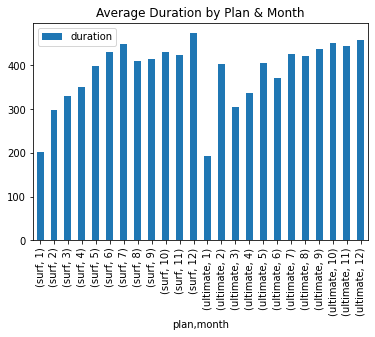

In [31]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
calls_pivot = new_data.pivot_table(index=['plan', 'month'], values='duration', aggfunc='mean')
calls_pivot.plot.bar(title='Average Duration by Plan & Month')


plan       surf  ultimate
month                    
1         406.0     774.0
2        2673.0    2822.0
3        7590.0    3651.0
4       17577.0    7074.0
5       30768.0   11781.0
6       41836.0   17435.0
7       54448.0   25197.0
8       66438.0   29922.0
9       80360.0   37626.0
10     101846.0   47778.0
11     119801.0   56540.0
12     150680.0   69324.0


array([[<AxesSubplot:title={'center':'surf'}>,
        <AxesSubplot:title={'center':'ultimate'}>]], dtype=object)

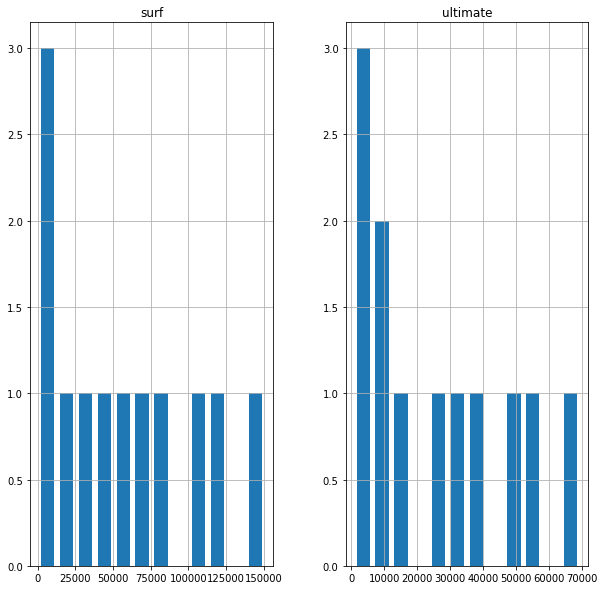

In [32]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
minutes_pivot = new_data.pivot_table(index='month', columns='plan', values='duration', aggfunc='sum')
print(minutes_pivot)
minutes_pivot.hist(bins=12, figsize=(10,10), rwidth=0.7)



[Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

In [33]:
# Calculate the mean and the variance of the monthly call duration

month_duration_pivot = new_data.pivot_table(index=['month', 'plan'], values='duration',
                                            aggfunc=['mean', np.var])

month_duration_pivot

mean           var
                  duration      duration
month plan                              
1     surf      203.000000  15842.000000
      ultimate  193.500000  16572.333333
2     surf      297.000000  52226.500000
      ultimate  403.142857  76889.476190
3     surf      330.000000  35809.363636
      ultimate  304.250000  61984.931818
4     surf      351.540000  50866.743265
      ultimate  336.857143  34888.928571
5     surf      399.584416  59754.219754
      ultimate  406.241379  43841.046798
6     surf      431.298969  45592.628436
      ultimate  370.957447  42503.563367
7     surf      449.983471  61005.099725
      ultimate  427.067797  72563.374635
8     surf      410.111111  54344.645963
      ultimate  421.436620  53645.506640
9     surf      414.226804  46595.958656
      ultimate  437.511628  57070.464569
10    surf      429.729958  52278.664056
      ultimate  450.735849  54261.910512
11    surf      423.325088  51607.021602
      ultimate  445.196850  60593.222847
12    surf      473.836478  63629.518918
      ultimate  459.099338  62503.783400

<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
    
It's great that you managed to calculate all the necessary metrics and display them.

There is also a way to display all statistical metrics in one table (you can pass all metrics to aggfunc at once.), using, for example, pivot_table:

`data.pivot_table(index= 'plan', values= '...', aggfunc= ['mean', 'var','std', 'median'])`

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    We see that the value of the variance for each plan is rather large, indicating that the sample size might be too small to draw any significance regarding the duration.

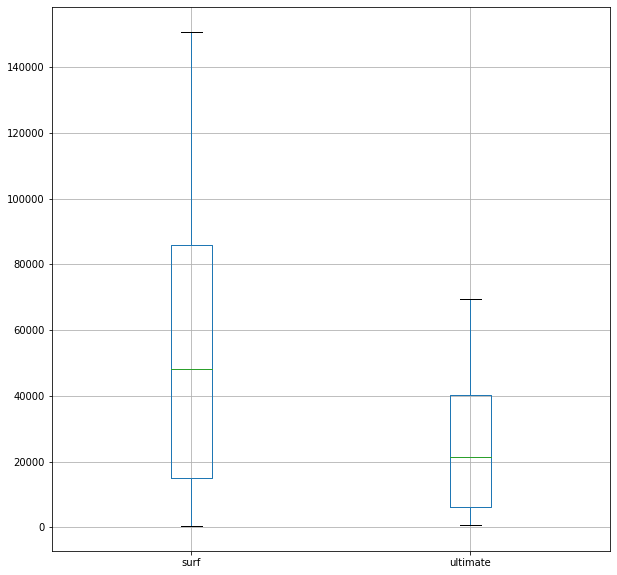

In [34]:
# Plot a boxplot to visualize the distribution of the monthly call duration


x1 = minutes_pivot.boxplot(figsize =(10,10))





[Formulate conclusions on how the users behave in terms of calling. Is their behaviour different between the plans?]

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    If we exclude the first month from our analysis (considering the small number of subscribers to both plans), we can see that those who use the surf package utilize their minutes more than those of the ultimate package. The mean duration for the surf package is closer to the plan's allowed limit.
    This could be due to the user profile - older people are more likely to use calls rather than text or internet on their phones.

### Messages

<AxesSubplot:title={'center':'Messages by Plan & Month'}, xlabel='plan,month'>

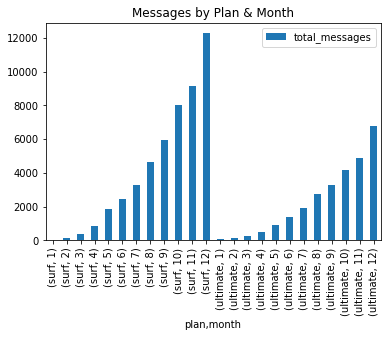

In [35]:
# Compare the number of messages users of each plan tend to send each month
messages_pivot = new_data.pivot_table(index=['plan', 'month'], values='total_messages', aggfunc='sum')
messages_pivot.plot.bar(title='Messages by Plan & Month')


[Formulate conclusions on how the users behave in terms of messaging. Is their behaviour different between the plans?]

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    Due to almost double the subscriptions, this helps explain the difference between the plans. It could mean that the surf plan users nearly maximize their messages.

### Internet

<AxesSubplot:title={'center':'GB Used by Plan & Month'}, xlabel='plan,month'>

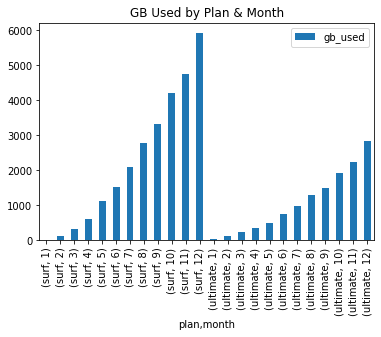

In [36]:
# Compare the amount of internet traffic consumed by users per plan
gb_used_pivot = new_data.pivot_table(index=['plan', 'month'], values='gb_used', aggfunc='sum')
gb_used_pivot.plot.bar(title='GB Used by Plan & Month')

[Formulate conclusions on how the users tend to consume the internet traffic? Is their behaviour different between the plans?]

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    Due to almost double the subscriptions, this helps explain the difference between the plans. It could mean that the surf plan users nearly maximize their gb_used.

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

surf        1573
ultimate     720
Name: plan, dtype: int64
                monthly_revenue
plan     month                 
surf     1                40.00
         2               339.57
         3              1106.65
         4              2105.53
         5              3857.37
ultimate 1               280.00
         2               490.00
         3               910.00
         4              1547.00
         5              2058.00


plan
surf        AxesSubplot(0.1,0.15;0.8x0.75)
ultimate    AxesSubplot(0.1,0.15;0.8x0.75)
dtype: object

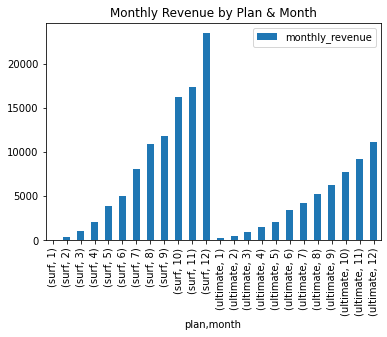

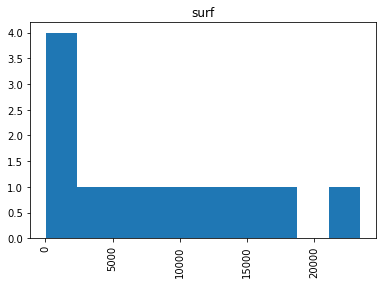

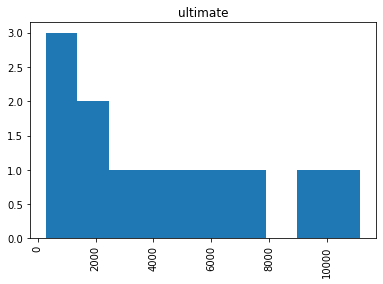

In [37]:
import matplotlib.pyplot as plt

gb_used_pivot = new_data.pivot_table(index=['plan', 'month'], values='monthly_revenue', aggfunc='sum')
gb_used_pivot.plot.bar(title='Monthly Revenue by Plan & Month')
print(new_data['plan'].value_counts())

plan_grouped = gb_used_pivot.groupby('plan')
print(plan_grouped.head())
plan_grouped.hist(by='plan')

[Formulate conclusions about how the revenue differs between the plans.]

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    As we saw throughout our tests, the explanation to the data is because we have nearly twice as many subscriptions to the surf plan. This doesn't skew the data, but helps explain its difference.

<div class="alert alert-danger">
<b>Reviewer's comment v1:</b>
    
Can you please additionally plot histograms and describe the distributions.

<div class="alert alert-success">
<b>Reviewer's comment v2:</b>
    
- I will write overall thoughts about the data analysis section:
- Very nice visualization of the data. Nice that you used different types of graphs.  
- Additionally would be nice to add both plans on one graph. 
- If you have time and willing to practice, you can display two charts (histogram and a box plot) using a two-column subplot.

```
    # Create one row with 2 columns
	  fig, axes = plt.subplots(1, 2, figsize=(16, 5))

	  # Create a histogram for the surf plan
	  sns.distplot(... ax=axes[0])
	  # Create a histogram for the second plan
	  sns.distplot(... ax=axes[0])
	
	  # Create a boxplot for both plans
	  sns.boxplot(... ax=axes[1])
```

## Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    Our null hypothesis will be that the average revenue from the 'ultimate' plan is equal to the average revenue from the 'surf' plan.
    The alternative hypothesis would be that the average revenues differ between both plans.

<div class="alert alert-danger">
<b>Reviewer's comment v1:</b>
    
Unfortunately, there is an issue in formulating null and alternative hypotheses.
A null hypothesis is a type of hypothesis used in statistics that proposes that there is no difference between certain characteristics of a population. An alternative hypothesis always contradicts the null one.
Can you please update that?

<div class="alert alert-danger">
<b>Reviewer's comment v2:</b>
    
Unfortunately, I did not notice changes in the hypotheses. Example of what we are trying to test for the first question would be: 
    
    The null hypothesis H₀ will be:

    The average revenue from users of the "ultimate" plan is equal to the average revenue from users of the "surf" plan.

    And the alternative hypothesis, H₁ based on H₀:

    The average revenue from users of the "ultimate" plan is different from the average revenue from users of the "surf" plan.

Can you please update it for both questions and add short interim conclusions with explanation of results in business terms?

In [38]:
# Test the hypotheses
from scipy import stats as st
alpha = 0.05
#optimal_surf_revenue = 20
#optimal_ultimate_revenue = 70

surf_revenue = new_data[new_data['plan']=='surf']
surf_monthly_revenue = surf_revenue['monthly_revenue'].tolist()   #array1
ultimate_revenue = new_data[new_data['plan']=='ultimate']
ultimate_monthly_revenue = ultimate_revenue['monthly_revenue'].tolist()  #array2
print(surf_revenue['monthly_revenue'].mean())
print(ultimate_revenue['monthly_revenue'].mean())

null_results = st.ttest_ind(surf_revenue['monthly_revenue'], ultimate_revenue['monthly_revenue'])
print(null_results)
print('p-value: ', null_results.pvalue)
if null_results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")    



#surf_results = st.ttest_1samp(surf_monthly_revenue, optimal_surf_revenue)
#print('p-value: ', surf_results.pvalue)
#if surf_results.pvalue < alpha:
    #print('We reject the null hypothesis for surf plan')
#else:
    #print("We can't reject the null hypothesis for surf plan")




#ultimate_results = st.ttest_1samp(ultimate_monthly_revenue, optimal_ultimate_revenue)
#print('p-value: ', ultimate_results.pvalue)
#if ultimate_results.pvalue < alpha:
    #print('We reject the null hypothesis for ultimate plan')
#else:
    #print("We can't reject the null hypothesis for ultimate plan")

63.6116846789574
72.70277777777778
Ttest_indResult(statistic=-4.2022012614900675, pvalue=2.744649278514165e-05)
p-value:  2.744649278514165e-05
We reject the null hypothesis


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    From our tests, we see that we can reject the null hypothesis. This matches the mean monthly revenues for each plan, which means we cannot reject the alternative hypothesis, and that avergae revenue differs between plans.

[Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    Our null hypothesis is that the data of NY-NJ and other states should be equal.
    The alternative hypothesis is that there is a difference between the revenues.

In [39]:
# Test the hypotheses
from scipy import stats as st
alpha = 0.05
optimal_revenue = new_data['monthly_revenue'].mean()



ny_nj_data = new_data[new_data['city'].str.contains('NY-NJ')]
ny_nj_data
other_states_data = new_data[~new_data['city'].str.contains('NY-NJ')]
other_states_data

ny_nj_revenue = ny_nj_data['monthly_revenue'].tolist()
other_states_revenue = other_states_data['monthly_revenue'].tolist()


print(ny_nj_data['monthly_revenue'].mean())
print(other_states_data['monthly_revenue'].mean())



#ny_nj_results = st.ttest_1samp(ny_nj_revenue, optimal_revenue)
#print('p-value: ', ny_nj_results.pvalue)
#if ny_nj_results.pvalue < alpha:
    #print('We reject the null hypothesis for NY-NJ')
#else:
    #print("We can't reject the null hypothesis for NY-NJ")
    
#other_states_results = st.ttest_1samp(other_states_revenue, optimal_revenue)
#print('p-value: ', other_states_results.pvalue)
#if other_states_results.pvalue < alpha:
    #print('We reject the null hypothesis for Other States')
#else:
    #print("We can't reject the null hypothesis for Other States")

relative_results = st.ttest_ind(ny_nj_revenue, other_states_revenue, equal_var=False)    
print('p-value: ', relative_results.pvalue)  
if relative_results.pvalue < alpha:
    print('We reject the alternative hypothesis')
else:
    print("We can't reject the alternative hypothesis")
    
    
print(relative_results)

62.72506631299734
67.20241649269312
p-value:  0.08381531697981728
We can't reject the alternative hypothesis
Ttest_indResult(statistic=-1.7320407743750164, pvalue=0.08381531697981728)


<div class="alert alert-warning" role="alert">
<b>Reviewer's comment v2:</b>
    
It is sufficient to import python packages only once. 

Also there is a typo in the code as the correct if/else output should be: 
    
    if relative_results.pvalue < alpha:
        print('We reject the null hypothesis)
    else:
        print("We can't reject the null hypothesis")

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    By our results, we see that we cannot reject the null hypothesis of eqaul average revenue between NY-NJ and other states. The mean values are close to one another, which means that there is no significant difference between NY-NJ and other states. 

<div class="alert alert-success">
<b>Reviewer's comment v3:</b>
    
- Well done! You got correct results for both questions. 
- Your conclusions based on the results are also correct. 
- You can also additionally compare the variances of the samples before testing hypotheses in order to understand with which equal_var parameter to use the ttest_ind test method (by default, True). Here you can manually calculate variances, or use Levene's statistic test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html) or Barlett's test (https: //docs.scipy .org / doc / scipy / reference / generated / scipy.stats.bartlett.html # scipy.stats.bartlett)

## General conclusion

[List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.]

<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
    
 You did great research with clean code, cool graphs, and correct intermediate conclusions. However, general conclusions in this case are a mini-presentation of the entire work in front of a business stakeholder. In a real project, this is probably the only thing that a business stakeholder will read. Therefore, it is necessary to indicate detailed comments in a structured way for all the conclusions that you received on each item of the work. It is also worth considering what will be interesting from the business stakeholder's perspective, such as a detailed description of the user for each tariff,  who brings more additional revenue, and who brings more in total.